<h1> Vamos dar um passada pelas técnicas de regressão </h1>

<h2> 1. Regressão Não Linear <h2>

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
#seja o valor de X
X = np.array([5,6,7,8,9,10,11,12,13,14,15])
Y = np.array([8,11,10,11,13,14,20,21,30,35,47])


In [5]:
for i,j in zip(X,Y): print("({},{})".format(i,j),end=", ")

(5,8), (6,11), (7,10), (8,11), (9,13), (10,14), (11,20), (12,21), (13,30), (14,35), (15,47), 

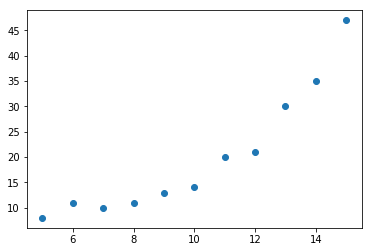

In [6]:
plt.scatter(X,Y)
plt.show()

In [49]:
# Vamos tentar aproximá-la por uma função exponencial usando regressão "não linear"
# y = b * eˆ{ax}
# ou
# ln y = ln b + ax
# o x continua, mas vamos transformar o Y
ylin = np.log(y)

In [50]:
ylin

array([ 2.13892939,  2.24936247,  2.37533382,  2.51681351,  2.67330249,
        2.84389107,  3.02735845,  3.22229146,  3.427201  ,  3.64061976,
        3.86117344])

In [51]:
# nossa função de regressão linear
def regressaoLinear(x,y):
    n = len(x)
    if n != len(y): raise Exception("Impossivel. Tamanhos diferentes ")
    mediaX,mediaY = sum(x)/n,sum(y)/n
    somas1 = sum([i*j for i,j in zip(x,y)])
    somas2 = sum([i**2 for i in x])
    sxy = somas1 - n * mediaX * mediaY
    sxx = somas2 - n * mediaX**2
    a = sxy / sxx
    b = mediaY - a * mediaX
    return a,b

In [53]:
a,blin = regressaoLinear(X,ylin)

In [54]:
# lembremos que blin = ln b
# entao 
b = np.exp(blin)

In [55]:
b

3.2247512742984243

In [56]:
# Agora vamos traçar a nossa curva
Yhat = b * np.exp(a * X)

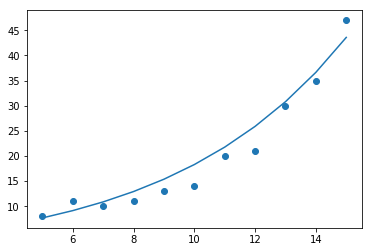

In [57]:
plt.scatter(X,Y)
plt.plot(X,Yhat)
plt.show()

# Resumindo:
# Encontre uma boa função não linear
# Linearize o modelo
# Aplique os métodos já estudados e boa sorte





<h1> Regressão Logística </h1>

In [7]:
# Seja o dataset kitesurf
# temperatura,humidade,velocidade do vento, Navegar(classe= SIM(1),NAO(0))

In [8]:
dskite = np.array([[38,99,10,0],
[37,95,80,1],
[36,90,20,0],
[28,90,30,0],
[25,60,40,1],
[25,65,60,1],
[25,64,70,1],
[28,89,34,0],
[26,65,33,0],
[28,64,32,0],
[29,67,80,1],
[27,93,70,1],
[39,64,25,0],
[32,88,63,1]])

In [11]:
for i in dskite: print(i[0],"&",i[1],"&",i[2],"&",i[3]," \\\\ \hline")

38 & 99 & 10 & 0  \\ \hline
37 & 95 & 80 & 1  \\ \hline
36 & 90 & 20 & 0  \\ \hline
28 & 90 & 30 & 0  \\ \hline
25 & 60 & 40 & 1  \\ \hline
25 & 65 & 60 & 1  \\ \hline
25 & 64 & 70 & 1  \\ \hline
28 & 89 & 34 & 0  \\ \hline
26 & 65 & 33 & 0  \\ \hline
28 & 64 & 32 & 0  \\ \hline
29 & 67 & 80 & 1  \\ \hline
27 & 93 & 70 & 1  \\ \hline
39 & 64 & 25 & 0  \\ \hline
32 & 88 & 63 & 1  \\ \hline


In [123]:
X = dskite[:,[0,1,2]]

In [166]:
Y = dskite[:,[-1]]

In [167]:
Y

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]])

In [144]:
#observe que a saida é binária. 
#Vamos tentar um scatter plot no plato usando uma combinacao linear  dos valores
# lebrete g = w0 + w1x1 + w2x2 + w3x3 .... +wnxn

w = np.array([2,1,10]) # Maior peso para velocidade do vento - aleatorio
Yhat = X.dot(w)


In [147]:
Yhat = 20*(Yhat - Yhat.min())/(Yhat.max() - Yhat.min()) - 10 #Normalizando (-10 a 10)

In [148]:
Yhat


array([-10.        ,  10.        ,  -7.49279539,  -5.07204611,
        -3.22766571,   2.68011527,   5.53314121,  -3.9481268 ,
        -5.04322767,  -5.24495677,   8.73198847,   6.48414986,
        -6.62824207,   4.61095101])

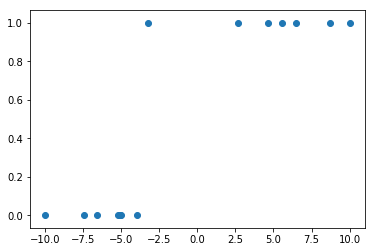

In [149]:
plt.scatter(Yhat,Y)
plt.show()

In [130]:
#
#Seja a função logística
#
def logit(g):
    return 1/(1 + np.exp(-g))


In [135]:
#seja 
x = np.arange(-10,10,0.01)

In [136]:
x

array([-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99])

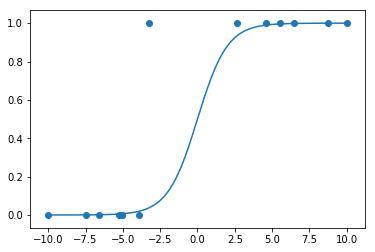

In [152]:
plt.plot(x,logit(x))
plt.scatter(Yhat,Y)
plt.show()

<h2> Nosso Problema agora é encontrar os parametros da equação (pesos) de entrada da curva para que
a mesma possa classificar corretamente </h2>

In [154]:
#Para isso = Gradiente Descendente ou usar o sklearn

In [158]:
X

array([[38, 99, 10],
       [37, 95, 80],
       [36, 90, 20],
       [28, 90, 30],
       [25, 60, 40],
       [25, 65, 60],
       [25, 64, 70],
       [28, 89, 34],
       [26, 65, 33],
       [28, 64, 32],
       [29, 67, 80],
       [27, 93, 70],
       [39, 64, 25],
       [32, 88, 63]])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X, Y.ravel())

In [173]:
clf.predict(X)

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [176]:
Y.ravel()

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [177]:
clf.predict_proba(X) 

array([[  1.00000000e+00,   8.72260916e-13],
       [  1.19923908e-06,   9.99998801e-01],
       [  9.99999995e-01,   4.94208880e-09],
       [  9.99996037e-01,   3.96271441e-06],
       [  7.14369127e-02,   9.28563087e-01],
       [  3.60247555e-06,   9.99996398e-01],
       [  8.71144168e-09,   9.99999991e-01],
       [  9.99947274e-01,   5.27255229e-05],
       [  9.54799404e-01,   4.52005960e-02],
       [  9.72502614e-01,   2.74973862e-02],
       [  1.11736620e-10,   1.00000000e+00],
       [  6.12864468e-05,   9.99938714e-01],
       [  9.99862834e-01,   1.37166108e-04],
       [  1.39004356e-03,   9.98609956e-01]])

In [178]:
clf.score(X, Y)

1.0

#Regressão Logística é Classificação. = 1 Neurônio de uma rede neural.